<a href="https://colab.research.google.com/github/petonorbert/petonorbert.github.io/blob/master/Norbert_Peto_model_work_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Descriptive analysis

## The dataset

Fertility and Women's Labor Supply

The dataset is a cross-section from the 1980 US Census on married women aged 21–35 with two or more children.
The data frame contains 254,654 (and 30,000, respectively) observations on 8 variables:

morekids
factor -> Does the mother have more than 2 children?

gender1
factor -> indicating gender of first child.

gender2
factor -> indicating gender of second child.

age
age of mother at census.

afam
factor -> Is the mother African-American?

hispanic
factor -> Is the mother Hispanic?

other
factor -> Is the mother's ethnicity neither African-American nor Hispanic, nor Caucasian? (see below)

work
number of weeks in which the mother worked in 1979.

Data source: https://vincentarelbundock.github.io/Rdatasets/csv/AER/Fertility.csv

Data source folder: https://github.com/vincentarelbundock/Rdatasets/tree/master/csv/AER

### Import database

In [ ]:
# run this cell to enable latter code running

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



#from google.colab import drive

In [ ]:
#drive.mount('/content/drive')

In [ ]:
# run this cell to enable latter code running

!mkdir data

!wget 'https://drive.google.com/uc?export=download&id=1MSW9aat3iNZ3tuofDJmOd4z53y6cpcnl' -O './data/Fertility.csv'

--2022-01-20 16:33:55--  https://drive.google.com/uc?export=download&id=1MSW9aat3iNZ3tuofDJmOd4z53y6cpcnl
Resolving drive.google.com (drive.google.com)... 142.250.153.101, 142.250.153.102, 142.250.153.100, ...
Connecting to drive.google.com (drive.google.com)|142.250.153.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rprgcj2utfpqtceomuupf5ieq1slp7sa/1642696425000/05370801664906535101/*/1MSW9aat3iNZ3tuofDJmOd4z53y6cpcnl?e=download [following]
--2022-01-20 16:33:56--  https://doc-04-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rprgcj2utfpqtceomuupf5ieq1slp7sa/1642696425000/05370801664906535101/*/1MSW9aat3iNZ3tuofDJmOd4z53y6cpcnl?e=download
Resolving doc-04-c0-docs.googleusercontent.com (doc-04-c0-docs.googleusercontent.com)... 108.177.127.132, 2a00:1450:4013:c07::84
Connecting to doc-04-c0-docs.googleusercontent.com (d

In [ ]:
df = pd.read_csv("/content/data/Fertility.csv", index_col=0)
df.head(2)


,morekids,gender1,gender2,age,afam,hispanic,other,work
1,no,male,female,27,no,no,no,0
2,no,female,male,30,no,no,no,30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254654 entries, 1 to 254654
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   morekids  254654 non-null  object
 1   gender1   254654 non-null  object
 2   gender2   254654 non-null  object
 3   age       254654 non-null  int64 
 4   afam      254654 non-null  object
 5   hispanic  254654 non-null  object
 6   other     254654 non-null  object
 7   work      254654 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 17.5+ MB


## Basic analysis of the data

In [ ]:
#df=df.drop_duplicates()
#df.info()

I choose not to drop the duplicate lines, since it would have dropped the mayority of the database. Since most of the columns are boolean, we have 2 integer columns only, it is natural that we have many duplicate lines, even if it is not a recording error but true and valid data.

In [ ]:
df.isnull().sum()

morekids    0
gender1     0
gender2     0
age         0
afam        0
hispanic    0
other       0
work        0
dtype: int64

There are no empty lines nor empty cells in the database.

In [ ]:
for column in df[['morekids', 'gender1', 'gender2', 'afam', 'hispanic', 'other']]:
  print(df[column].value_counts(),'\n')


no     157742
yes     96912
Name: morekids, dtype: int64 

male      130984
female    123670
Name: gender1, dtype: int64 

male      130523
female    124131
Name: gender2, dtype: int64 

no     241498
yes     13156
Name: afam, dtype: int64 

no     235757
yes     18897
Name: hispanic, dtype: int64 

no     240306
yes     14348
Name: other, dtype: int64 



Three of the parameters refer to the ethnicity of the included mums. One of them is the 'other', so all mums who did not claim being in the afam ot hispanic group shall be categorized as 'other'. I suspect some ethnicity groups were deleted from the database so currently a lot of the mums is not in any category.
With the following code I organize the 3 ethnicity columns in one variable and add all the non-specified lines to the 'other' category.


In [ ]:
# run this cell to enable latter code running

df['ethn']='cau'
df.loc[df.afam=='yes', 'ethn'] = 'afam'
df.loc[df.hispanic=='yes', 'ethn']='hisp'
df.loc[df.other=='yes', 'ethn']= 'other'
df.drop(['other', 'hispanic', 'afam'], inplace=True, axis=1)
df.head(5)

,morekids,gender1,gender2,age,work,ethn
1,no,male,female,27,0,cau
2,no,female,male,30,30,cau
3,no,male,female,27,0,cau
4,no,male,female,35,0,afam
5,no,female,female,30,22,cau


In [ ]:
df.corr()

,age,work
age,1.00000,0.11114
work,0.11114,1.00000


There is no significant correlation between the age of the involved mums and the number of weeks they worked in that year.

### Let's see the distribution of the dataset by the parameters

Text(0.5, 1.0, 'gender2')

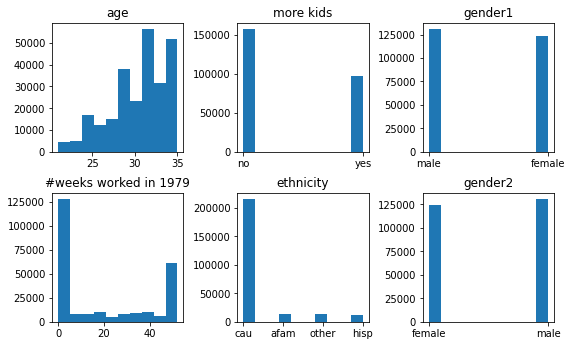

In [ ]:
fig,ax=plt.subplots(2,3, figsize=(8,5))
fig.tight_layout(pad=2)
ax[0,0].hist(df['age'])
ax[0,0].set_title('age')
ax[0,1].hist(df['morekids'])
ax[0,1].set_title('more kids')
ax[1,0].hist(df['work'])
ax[1,0].set_title('#weeks worked in 1979')
ax[1,1].hist(df['ethn'])
ax[1,1].set_title('ethnicity')
ax[0,2].hist(df['gender1'])
ax[1,2].hist(df['gender2'])
ax[0,2].set_title('gender1')
ax[1,2].set_title('gender2')

The above charts show the distribution of the dataset based on the certain variables.

As expected, the number of the boy and girl kids is fairly even in both the case of the first and the second children. 

There is a huge imbalance in the sample to the Caucasian ethnicity, however this may be representative to the subject population, so this may not be a disatvantage after all.

The number of weeks worked is very biased to the 0 and to the 52, so most mums either stayed with their children all year or worked the whole year through.

### Let's see some interesting takeaways from the database. Or the lack of them.

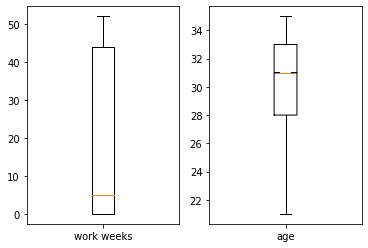

In [ ]:
fig, axs=plt.subplots(1,2)
axs[1].boxplot(df['age'], notch=True, labels=(['age']))
axs[0].boxplot(df['work'], labels=(['work weeks']))
plt.show()

As suspected from the histogram half of the mums work less than 5 weeks a year. Then another 25% distributes between 5 and 42 weeks, and then 25 percent of them works almost the whole year.
Half of the sample population is aged 28 and 33 years and the whole sample is from the 21-35 year old mums.

#### Let's see how time passes by between the arrival of the 2nd and 3rd childling:

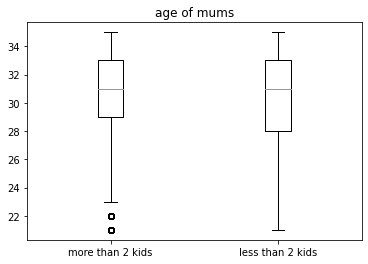

In [ ]:
fig, ax2=plt.subplots(1,1)
plt.title('age of mums')
ax2.boxplot(df.query('morekids=="yes"')['age'], positions=[1], labels=["more than 2 kids"])
ax2.boxplot(df.query('morekids=="no"')['age'],positions=[2], labels=['less than 2 kids'])
plt.show()

Surprisingly there is only a tiny difference between the ages of the mums with 2 and 3 kids. The only takaway here is that the 3rd
 kid rarely arrives before the mum turns 23.

#### One would think the number of attention-eager offsprings has mayor effect on the mum's remaining energy level- to take a job for example:

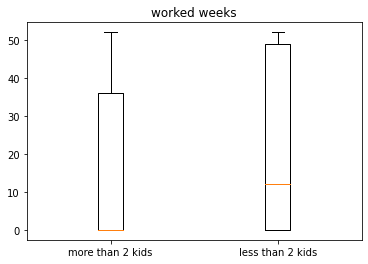

In [ ]:
fig, ax3=plt.subplots(1,1)
plt.title('worked weeks')
ax3.boxplot(df.query('morekids=="yes"')['work'], positions=[1], labels=["more than 2 kids"])
ax3.boxplot(df.query('morekids=="no"')['work'],positions=[2], labels=['less than 2 kids'])
plt.show()

And there is an effect indeed, mums who have more than 2 kids had much less chance to work.


#### Let's see how the ethnicity affects the mums' income-seeking efforts:

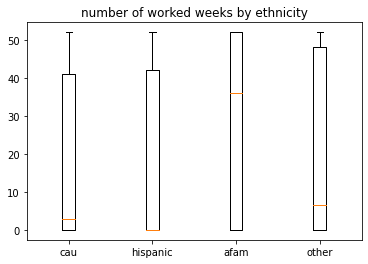

In [ ]:
fig, ax4=plt.subplots(1,1)
plt.title('number of worked weeks by ethnicity')
ax4.boxplot(df.query('ethn=="cau"')['work'],positions=[1], labels=['cau'])
ax4.boxplot(df.query('ethn=="hisp"')['work'], positions=[2], labels=["hispanic"])
ax4.boxplot(df.query('ethn=="other"')['work'],positions=[4], labels=['other'])
ax4.boxplot(df.query('ethn=="afam"')['work'],positions=[3], labels=['afam'])
plt.show()

This suggests that african-american mums worked more weeks. 
Let's see if this is because they have less kids:


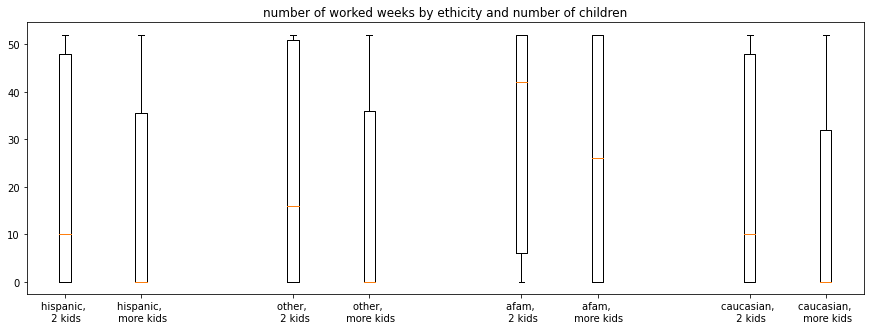

In [ ]:
fig, ax5=plt.subplots(1,1, figsize=(15,5))
plt.title('number of worked weeks by ethicity and number of children')
ax5.boxplot(df.query('ethn=="hisp" & morekids=="no" ')['work'], positions=[1], labels=["hispanic, \n 2 kids"])
ax5.boxplot(df.query('ethn=="hisp" & morekids=="yes" ')['work'], positions=[2], labels=["hispanic, \n more kids"])
ax5.boxplot(df.query('ethn=="other" & morekids=="no"')['work'],positions=[4], labels=['other, \n 2 kids'])
ax5.boxplot(df.query('ethn=="other" & morekids=="yes"')['work'],positions=[5], labels=['other, \n more kids'])
ax5.boxplot(df.query('ethn=="afam" & morekids=="no"')['work'],positions=[7], labels=['afam, \n 2 kids'])
ax5.boxplot(df.query('ethn=="afam" & morekids=="yes"')['work'],positions=[8], labels=['afam, \n more kids'])
ax5.boxplot(df.query('ethn=="cau" & morekids=="no"')['work'],positions=[10], labels=['caucasian, \n 2 kids'])
ax5.boxplot(df.query('ethn=="cau" & morekids=="yes"')['work'],positions=[11], labels=['caucasian, \n more kids'])

plt.show()

No, it is not. This actually suggests that half of the afro-american mums worked more than 20 weeks even if they had more than 2 kids, however in the other 3 ethnicity group half of the mums did not work at all if they had 3  or more kids. Also half of the afam mums with 2 kids worked more than 40 weeks and in the other 3 ethnicity groups half of the mums in such families worked only 12 weeks. 
This suggests this is a strong marker for  the number of worked weeks.

#### And just for my interest, let's see if the mums feel the desire to get a 3rd child if the first 2 happen to be 2 little devils or 2 little angels:

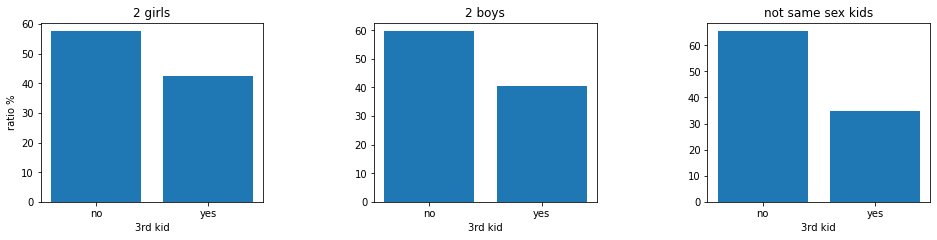

In [ ]:
# run this cell to enable latter code running

# Lets create a parameter that tells us if the gender of the first 2 children are the same:
df["samesex"]='no'
df.loc[df.gender1==df.gender2, "samesex"]='yes'

fig, ax6=plt.subplots(1,3, figsize=(15,5))
fig.tight_layout(pad=8)
same_girl, counts_girl=np.unique(df.query(('samesex=="yes" & gender1=="female"'))['morekids'], return_counts=True)
counts_girl=counts_girl/sum(counts_girl)*100
ax6[0].bar(same_girl,counts_girl)
same_no, counts_no=np.unique(df.query('samesex=="no"')['morekids'], return_counts=True)
counts_no=counts_no/sum(counts_no)*100
same_boy, count_boy=np.unique(df.query('samesex=="yes" & gender1=="male"')['morekids'], return_counts=True)
count_boy=count_boy/sum(count_boy)*100
ax6[1].bar(same_boy,count_boy)
ax6[2].bar(same_no, counts_no)
ax6[0].title.set_text("2 girls")
ax6[1].title.set_text("2 boys")
ax6[2].title.set_text("not same sex kids")
ax6[0].set_xlabel("3rd kid")
ax6[2].set_xlabel("3rd kid")
ax6[1].set_xlabel("3rd kid")
ax6[0].set_ylabel("ratio %")

plt.show()


It seems if the first 2 kids are of the same gender than there is better chance that the family decides to get a third one.
At least it is so in this dataset.

# Inferential analysis

## Set a goal




 **We have a potential connection between the number of weeks a mum can work in a year and the rest of the parameters (as input).**

 **Let's take a look which of the bonds are the strongest, and try to establish a model that predicts such value.**


---



#### During the attempts to work out an acceptable model I tried the following:
> 1.   I tried to run an xgb classifier with binary logistic objective function on a reduced, one-hot encoded dataset (about 4000 entries) for computation time reduction. I left the distribution of the prediction to 52 weeks. 
>> *The model gave 90% accuracy but almost zero recall and precision in the classes other than 0 or 52 weeks.*

> 2. I tried the same with xgb regressor by rounding the predected weeks to integers. *The prediction was 3 weeks for the whole test set.*

> 3. Tried to reduce the prediction to 4 classes, in this case I could use the whole dataset. I run the following classifiers:

>> 1.   xgb classifier
>> 2.   svc classifier
>> 3.   DecisionTreeClassifier
>> 4.   GaussianNB
*More or less all of them came back with the same result: very few prediction other than 0 or 52, almost zero recall and precision on them. On 0 and 52 classes a bit more than 50% misclassification.*

> 4. I suspected the huge imbalance in the dataset to the 0 and 52 weeks outcome does not help. So I tried sinthetic balancing strategies to overcome the issue. I tried XGBClassifier on modified database with SMOTE and NearMiss algorithms. *None of them improved the result considerably.*

> 5. I dropped the idea of synthetical balancing. Took out the 'age' parameter from the one-hot encoding and left it as ordinal parameter. Also applied standard scaler to the whole input before using it for the teaching. Also reduced the prediction aspiration to 2 categories.
>> 

>> *   a) more than 10weeks **vs** less than 10 weeks
>> *   b) zero **vs** non zero:    ***This is the status that you will see below***








## Manipulation of the database for easy processing

####Once again the header of the prepared dataframe:

In [ ]:
df.head()

,morekids,gender1,gender2,age,work,ethn,samesex
1,no,male,female,27,0,cau,no
2,no,female,male,30,30,cau,no
3,no,male,female,27,0,cau,no
4,no,male,female,35,0,afam,no
5,no,female,female,30,22,cau,yes



#### 1. One-hot encoding

In [ ]:


df_=df.copy()

# And let's create a matrix with specific columns for each potential value of all parameters -> one-hot-encoding.
cols = ["morekids", "ethn", "gender1", "gender2","samesex"]
a = pd.get_dummies(df_, columns=cols, prefix=cols, drop_first=False)

a.head()


,age,work,morekids_no,morekids_yes,ethn_afam,ethn_cau,ethn_hisp,ethn_other,gender1_female,gender1_male,gender2_female,gender2_male,samesex_no,samesex_yes
1,27,0,1,0,0,1,0,0,0,1,1,0,1,0
2,30,30,1,0,0,1,0,0,1,0,0,1,1,0
3,27,0,1,0,0,1,0,0,0,1,1,0,1,0
4,35,0,1,0,1,0,0,0,0,1,1,0,1,0
5,30,22,1,0,0,1,0,0,1,0,1,0,0,1


#### 2. Scaling of the input parameters

In [ ]:
# and let's standardize the input columns
a_stand=pd.DataFrame(StandardScaler().fit_transform(a.drop(['work'],axis=1)))
a_stand["rn"]=range(1,len(a.work)+1)
a_stand=a_stand.set_index('rn')
col_names=a.drop(['work'],axis=1).columns
a_stand.columns=col_names
a_stand["work"]=a.work
a_stand.head()

,age,morekids_no,morekids_yes,ethn_afam,ethn_cau,ethn_hisp,ethn_other,gender1_female,gender1_male,gender2_female,gender2_male,samesex_no,samesex_yes,work
rn,,,,,,,,,,,,,,
1,-1.002016,0.783818,-0.783818,-0.231563,0.422816,-0.215616,-0.244351,-0.971680,0.971680,1.025424,-1.025424,1.011199,-1.011199,0
2,-0.116130,0.783818,-0.783818,-0.231563,0.422816,-0.215616,-0.244351,1.029146,-1.029146,-0.975207,0.975207,1.011199,-1.011199,30
3,-1.002016,0.783818,-0.783818,-0.231563,0.422816,-0.215616,-0.244351,-0.971680,0.971680,1.025424,-1.025424,1.011199,-1.011199,0
4,1.360347,0.783818,-0.783818,4.318475,-2.365093,-0.215616,-0.244351,-0.971680,0.971680,1.025424,-1.025424,1.011199,-1.011199,0
5,-0.116130,0.783818,-0.783818,-0.231563,0.422816,-0.215616,-0.244351,1.029146,-1.029146,1.025424,-1.025424,-0.988925,0.988925,22


#### Let's organize the number of working weeks in categories. 

The idea is that we have few records other than 0 or 52, so let's choose those values as categories. For the estimation of worked weeks in weekly resolution i run a model on a reduced sample size (for the sake of running time reduction), but it predicted very few outcomes differ to 0 or 52 and the prediction was not at all reliable.

So let's reduce the expectation and try to estimate if the mums can work more or less than half of the year.



In [ ]:
a_stand["work_cty"]="x"
#a_stand.loc[(a_stand.work>0)&(a_stand.work<=26), "work_cty"]="<=half year"
#a_stand.loc[(a_stand.work>26)&(a_stand.work<52), "work_cty"]=">half year"
a_stand.loc[(a_stand.work==0), "work_cty"]="no work"
a_stand.loc[(a_stand.work>0), "work_cty"]="yes work"
a_stand.work_cty.value_counts()

yes work    134513
no work     120141
Name: work_cty, dtype: int64

## Prepare the model

#### Let's see which features have the strongest predictive power

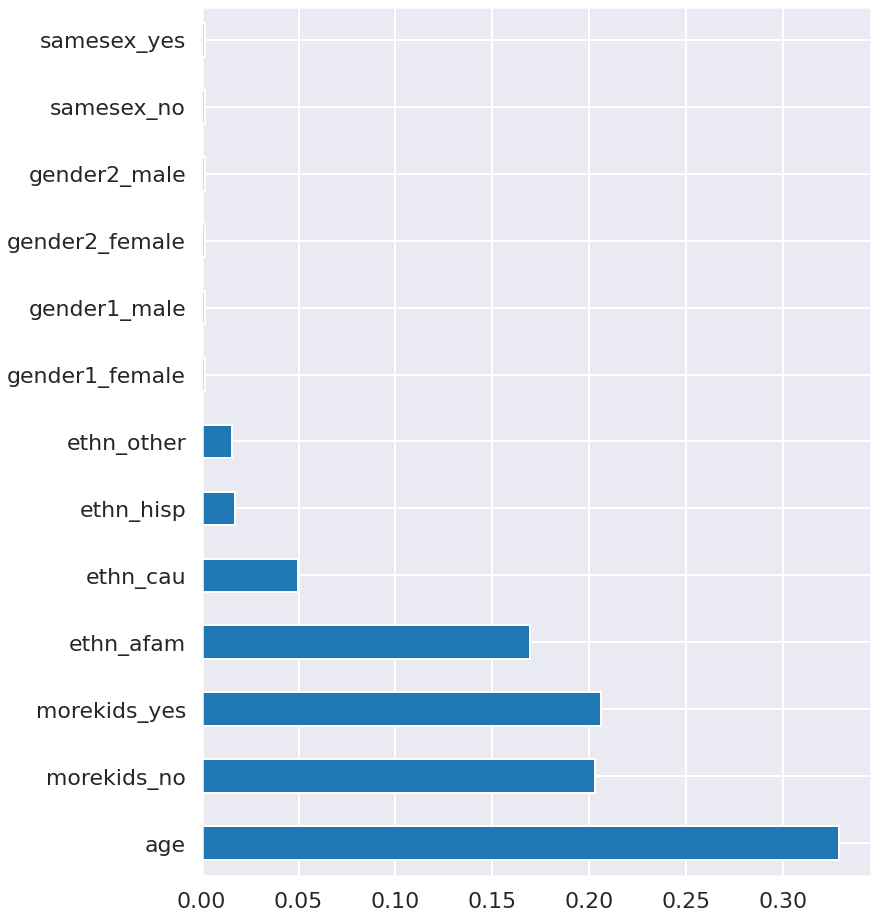

In [ ]:
from sklearn.ensemble import RandomForestClassifier

sns.set_style("darkgrid")
sns.set_context("poster")

rf = RandomForestClassifier()
rf.fit(a_stand.drop(["work", "work_cty"], axis=1), a_stand.work_cty)
importances = rf.feature_importances_
features = pd.Series(importances, index=a_stand.drop(["work", "work_cty"], axis=1).columns)
plt.figure(figsize=(12, 16))
features.plot(kind="barh")
plt.show()

It is clear that the gender of the kids has no significant effect on the number of weeks a mum can work. Also it has no effect if they are of the same sex.
The number of kids, the ethnicity shows strong predictive power, but age is the most informative.

#### Let's split the database into train and test set

In [ ]:
#Lets drop those columns which have few predictive power, they do not show up later in the decision tree anyways

X=a_stand.drop(["work", "work_cty", "gender2_male", "gender2_female", "gender1_male","gender1_female","samesex_yes", 
                "samesex_no", "ethn_cau", "ethn_hisp", "ethn_other", "morekids_no"], axis=1)
y = a_stand.work_cty
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print("y_test:\n", y_test.value_counts(),"\n\ny_train:\n", y_train.value_counts())

y_test:
 yes work    40354
no work     36043
Name: work_cty, dtype: int64 

y_train:
 yes work    94159
no work     84098
Name: work_cty, dtype: int64


####Model1: XGBClassifier

Originally I run this model with multiple "learning_rate", "max_depth" etc.  prameters, and based on the result of the crossvalidation I finally choose the below parameter set. I do not run the gridsearch anymore, since the calculation run more than 10 hours the first time.

In [ ]:
from xgboost import XGBClassifier
#from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(objective="binary:logistic", eval_metric="auc")

#params = {"max_depth":np.arange(3), "n_estimators":[100], "learning_rate":[0.06], "colsample_bytree":[0.45],"subsample":[0.45]}
#grid_xgb = GridSearchCV(estimator = xgb, param_grid = params, cv=5, n_jobs=-1)
xgb.fit(X_train, y_train)
#xgb_pred = grid_xgb.predict(X_test)
xgb_pred = xgb.predict(X_test)

In [ ]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

     no work       0.57      0.35      0.43     36043
    yes work       0.57      0.77      0.65     40354

    accuracy                           0.57     76397
   macro avg       0.57      0.56      0.54     76397
weighted avg       0.57      0.57      0.55     76397



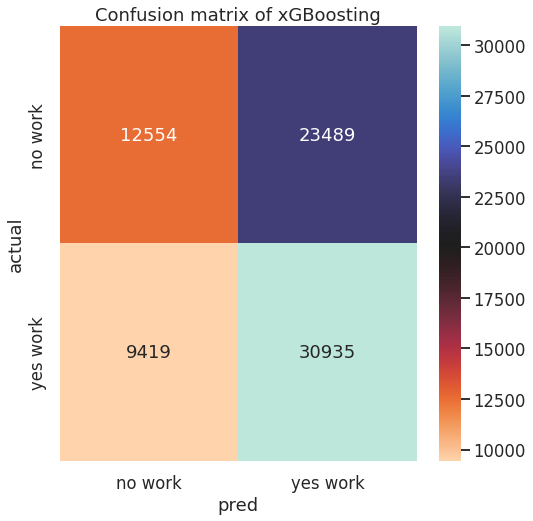

In [ ]:
sns.set_context("talk")
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, xticklabels=np.unique(a_stand.work_cty.values), yticklabels=np.unique(a_stand.work_cty.values), fmt="g", cmap="icefire_r")
plt.ylabel("actual")
plt.xlabel("pred")
plt.title("Confusion matrix of xGBoosting")
plt.show()

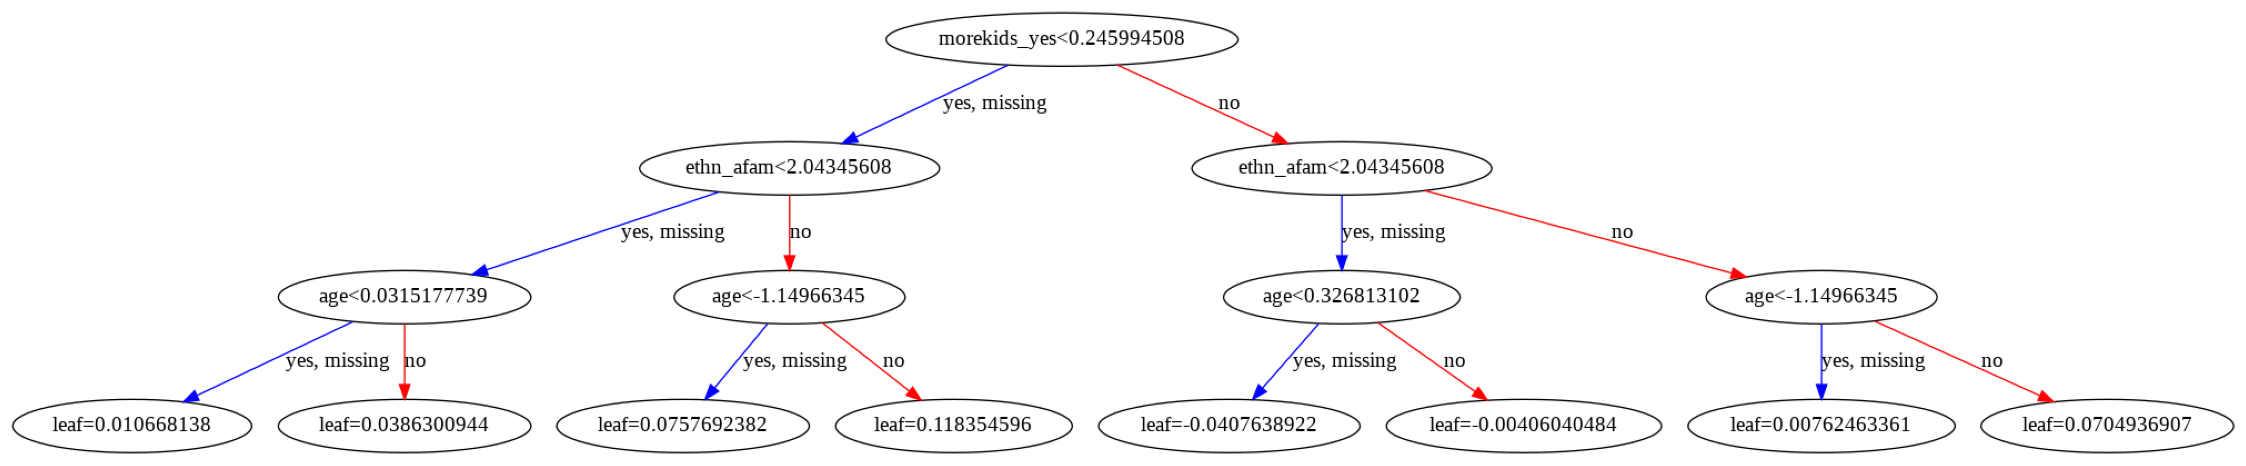

In [ ]:
import xgboost
from xgboost import plot_tree
plt.rcParams['figure.figsize'] = [40, 20]
xgboost.plot_tree(xgb)
plt.show()

In [ ]:
# let's store the recall data in a dataframe for later comparison
cm=confusion_matrix(y_test,xgb_pred)
recall_summary=pd.DataFrame(np.round(np.diagonal(cm)/np.sum(cm,axis=1)*100,2), index=list(np.unique(a_stand.work_cty.values)), columns=['XGBC'])
print("recall summary:\n",recall_summary)

prec_summary=pd.DataFrame(np.round(np.diagonal(cm)/np.sum(cm,axis=0)*100,2), index=list(np.unique(a_stand.work_cty.values)), columns=['XGBC'])
print("\nprec summary:\n",prec_summary)

recall summary:
            XGBC
no work   34.83
yes work  76.66

prec summary:
            XGBC
no work   57.13
yes work  56.84


#### Model 2: SVC

In [ ]:
#this cell was running for 2 hrs
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
svc_pred=svc.predict(X_test)

              precision    recall  f1-score   support

     no work       0.55      0.42      0.48     36043
    yes work       0.57      0.70      0.63     40354

    accuracy                           0.57     76397
   macro avg       0.56      0.56      0.55     76397
weighted avg       0.56      0.57      0.56     76397



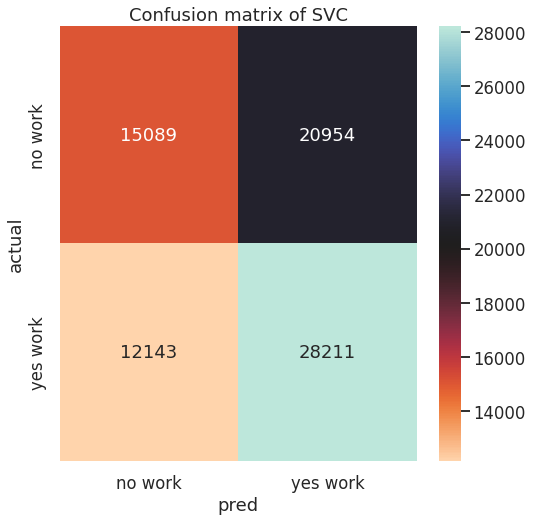

In [ ]:
print(classification_report(y_test, svc_pred))

sns.set_context("talk")
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix(y_test, svc_pred), annot=True, xticklabels=np.unique(a_stand.work_cty.values), 
            yticklabels=np.unique(a_stand.work_cty.values), fmt="g", cmap="icefire_r")
plt.ylabel("actual")
plt.xlabel("pred")
plt.title("Confusion matrix of SVC")
plt.show()

             precision    recall  f1-score   support

     no work       0.55      0.42      0.48     36043
    yes work       0.57      0.70      0.63     40354

    accuracy                           0.57     76397
    macro avg       0.56      0.56      0.55     76397
    weighted avg       0.56      0.57      0.56     76397

In [ ]:
# let's store the recall data in a dataframe for later comparison
cm=confusion_matrix(y_test,svc_pred)
recall_summary['SVC']=np.round(np.diagonal(cm)/np.sum(cm,axis=1)*100,2)

prec_summary["SVC"]=np.round(np.diagonal(cm)/np.sum(cm,axis=0)*100,2)
#prec_summary["SVC"]=[55.41,57.38] # typed in manually because did not want to run the SVC training again, for it is running for more than 2 hrs
print("rec summary:\n", prec_summary)

#recall_summary['SVC']=[41.86,69.91] # typed in manually because did not want to run the SVC training again, for it is running for more than 2 hrs
print("\nrecall summary:\n", recall_summary)

rec summary:
            XGBC    SVC
no work   57.13  55.41
yes work  56.84  57.38

recall summary:
            XGBC    SVC
no work   34.83  41.86
yes work  76.66  69.91


####Model3: DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(max_leaf_nodes=20)
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=20)

In [ ]:
dec_tr_pred=dec_tree.predict(X_test)

              precision    recall  f1-score   support

     no work       0.58      0.33      0.42     36043
    yes work       0.57      0.78      0.66     40354

    accuracy                           0.57     76397
   macro avg       0.57      0.56      0.54     76397
weighted avg       0.57      0.57      0.54     76397



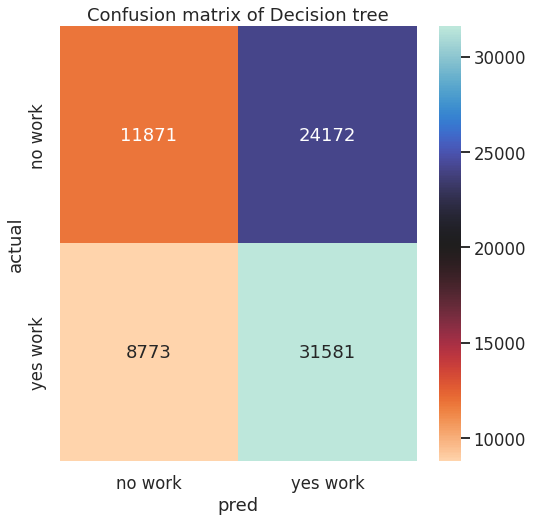

In [ ]:
print(classification_report(y_test, dec_tr_pred))

sns.set_context("talk")
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix(y_test, dec_tr_pred), annot=True, xticklabels=np.unique(a_stand.work_cty.values), yticklabels=np.unique(a_stand.work_cty.values), 
            fmt="g", cmap="icefire_r")
plt.ylabel("actual")
plt.xlabel("pred")
plt.title("Confusion matrix of Decision tree")
plt.show()

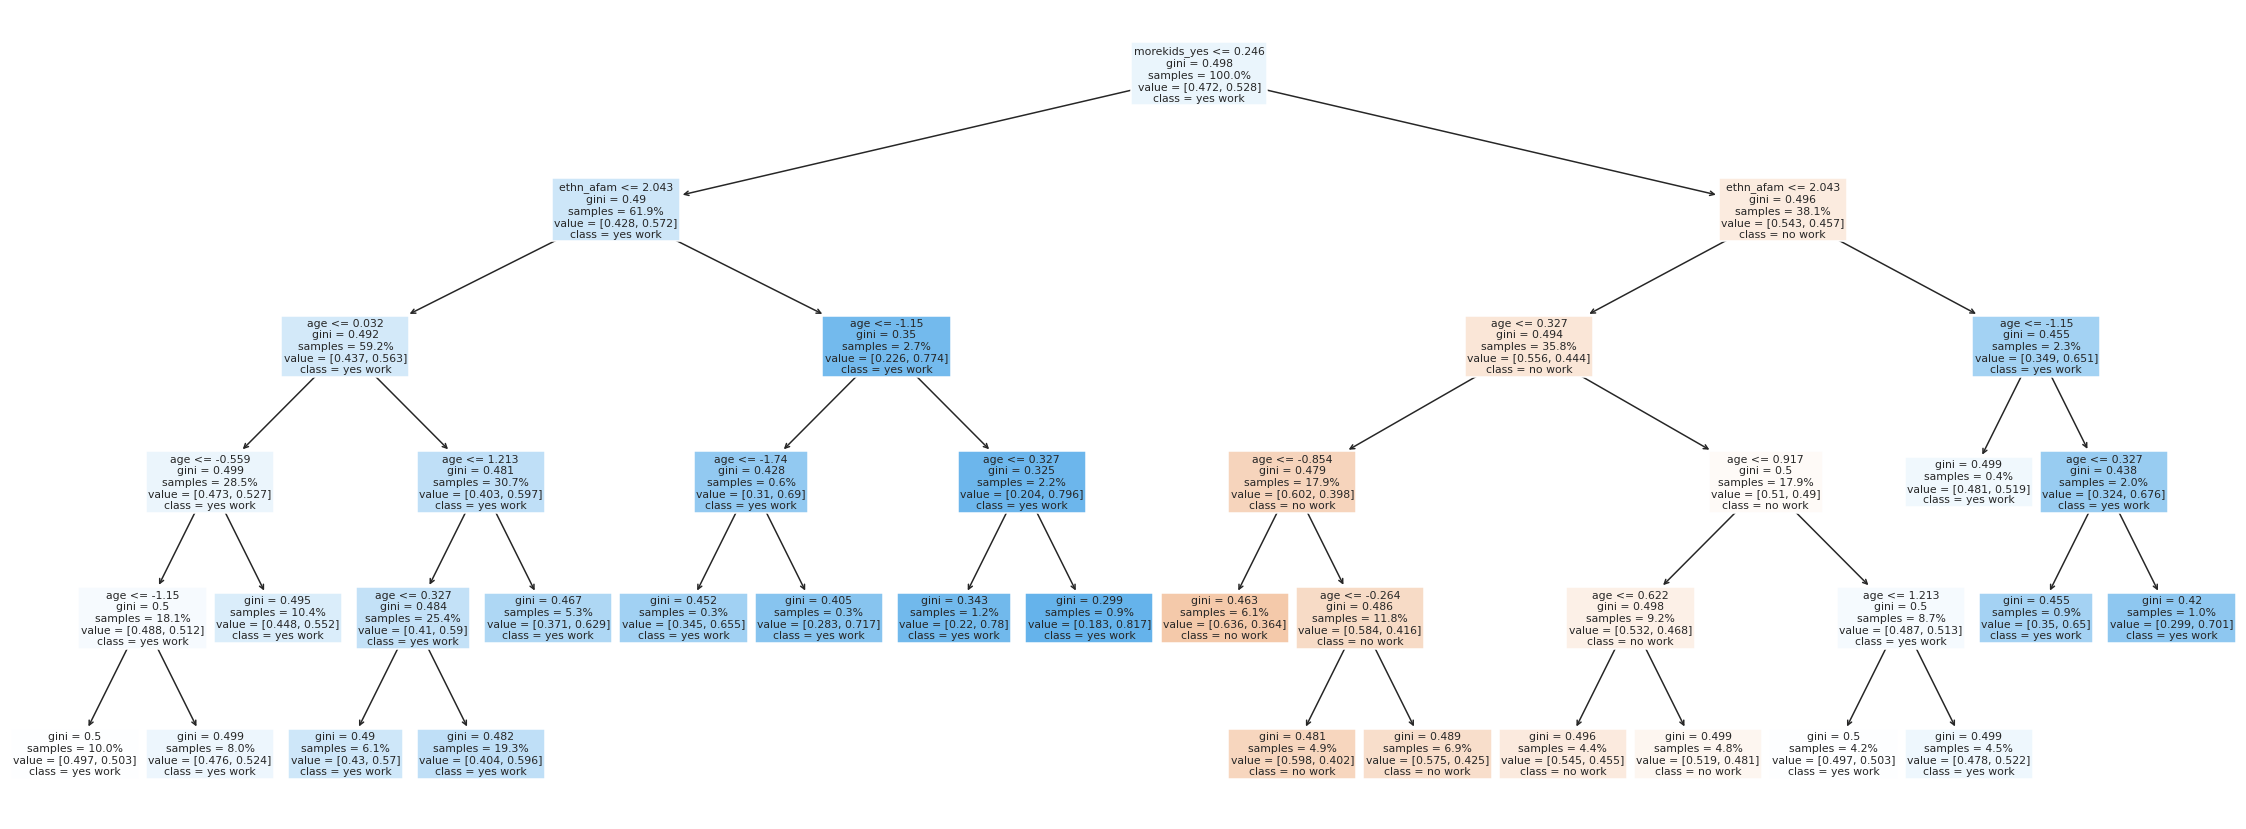

In [ ]:
import sklearn

fig=plt.figure(figsize=(40,15))
_=sklearn.tree.plot_tree(dec_tree, feature_names=dec_tree.feature_names_in_, class_names=list(np.unique(y_train.values)), filled=True, proportion=True,)

##Conclusion

If the mum has only 2 kids and afroamerican the decision tree concludes that the mum would work, regardless the age parameter.  (I dropped the rest of the ethnicities earlier, because former trials showed they did not appear in the decision tree). 

If the mum has more than 2 kids and afroamerican then she will be also classified as worker regardless her age.

The only case the classification depends on the age is when the mum has more than 2 kids and not afro-american.
In this case the mum is predicted to work only if she is above 33yrs old (0.917 in standardized scale).

The "value"s for the decision in the critical cells (morekids and afam) are very close to each other, so the decision is not very decisive. 
To me this shows that the information in the dataset is quite stochastic, and maybe no more reliable prediction can be made based on it.


The comparison of the 3 classification model comes to very similar result, the "no work" outcomes are often misclassified as "work". From the below comparison of the recall values it is visible that more of the "yes work" outcomes classified correctly, the less of the " no work" outcomes are.

In [ ]:
cm=confusion_matrix(y_test, dec_tr_pred)
recall_summary['Dec Tree']=np.round(np.diagonal(cm)/np.sum(cm,axis=1)*100,2)
prec_summary["Dec Tree"]=np.round(np.diagonal(cm)/np.sum(cm,axis=0)*100,2)
print("recall summary:\n", recall_summary)
print("\nprec summary:\n", prec_summary)

recall summary:
            XGBC    SVC  Dec Tree
no work   34.83  41.86     32.94
yes work  76.66  69.91     78.26

prec summary:
            XGBC    SVC  Dec Tree
no work   57.13  55.41     57.50
yes work  56.84  57.38     56.64
